# Unit 5 - Incremental Capstone - NLP

### Aravind Kothandaraman
2509 batch

#### This is being worked upon using the "car reviews" zip file dataset provided in the IC dataset.

# Install and Import necessary packages

In [1]:
# Install required packages (only once; skip if already installed)
# NLTK (Natural Language Toolkit) is a Python library for teaching and working with human language data, offering tools for tokenization, tagging, and parsing.
!pip install nltk

In [2]:
# Import the necessary packages
import nltk
from nltk.tokenize import sent_tokenize

In [3]:
# Download required NLTK data
nltk.download('punkt')  # Sentence tokenizer
nltk.download('words')  # English word list
nltk.download('stopwords')  # Common stopwords
nltk.download('wordnet')  # WordNet lexical database
nltk.download('punkt_tab') # Download punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
# Import WordNet, a lexical database used for lemmatization and semantic analysis
from nltk.corpus import wordnet

# Import a list of common English stopwords (e.g., "the", "and", "is") used for filtering out non-informative words
from nltk.corpus import stopwords

In [5]:
import pandas as pd
import numpy as np

# Task-1 - PreProcessing Datasource

## Load the "reviews.zip" dataset, extract the dataset file and cleanse/preprocess the text data.

Drag drop the `reviews.zip` into the Colab documents/files section to run further down below.

## Extract the dataset from the zip file

In [8]:
source_zip = '/content/review.zip'
import zipfile
with zipfile.ZipFile(source_zip, 'r') as zip_ref:
    zip_ref.extractall('.')

## Load the data and review

In [9]:
dataset = '/content/Car_Reviews_Database.csv' # 'Car_Reviews_Database.csv'

In [10]:
# tried with the `utf-8` encoding, but it didnt work.
# attempted with `latin1` encoding and it worked.
car_reviews_df = pd.read_csv(dataset, encoding="latin1")

In [11]:
car_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    278 non-null    int64 
 1   Model   278 non-null    object
 2   Review  234 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.6+ KB


In [12]:
car_reviews_df.head(10)

,Year,Model,Review
0,2009,Honda,Although arguably the first-generation Insight...
1,2009,Honda,2009 Honda Accord EX-L 4 : This car is very c...
2,2010,Honda,I have owed and driven Honda products for 20 y...
3,2010,Honda,"Honda Accord Euro L : The seats are average, b..."
4,2011,Honda,Honda HR-V: Continuous variable transmission ...
5,2011,Honda,Not much has changed with the historically sec...
6,2012,Honda,Honda Ballade 150 1.5: This is the most reliab...
7,2012,Honda,"Ride quality is top-notch, though communicatio..."
8,2013,Honda,Honda Jazz Hybrid 1.4 : This is my second Hond...
9,2013,Honda,"The CR-V's voluminous cargo area, quick-foldin..."


## Data preprocessing - Rename columns for easier handling

In [13]:
# rename columns for easier handling
car_reviews_df.rename(columns={'Review': 'review_text', 'Model ': 'car_make', 'Year': 'car_year'}, inplace=True)

In [14]:
car_reviews_df.isnull().sum()

,0
car_year,0
car_make,0
review_text,44


We have some null/empty reviews data in our raw dataset. We are going to first clean the existing ones and remove the null/empty reviews data rows.

### Text cleaning tasks

### Word tokenization, lemmatization and stopwords removal

using tokens and stopwords removal to remove the noise from the text data.

**Next step is lemmatization.**

###### *Writing my own words about understanding and its purpose of usage*

This is to find the root word of the words/texts in the given dataset, so that we try to minimize the total characters/words as our input to the NLP. The lesser the tokens are, the better the efficiency and performance of the NLP models.

In [15]:
# need these for the wordnet_pos_tag usage
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [16]:
import string
import re
import nltk

def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "R": wordnet.ADV}
  return tag_dict.get(tag, wordnet.NOUN)

def clean_reviews(review_text):
  """Clean a single review string.
  - Handles None/NaN inputs safely.
  - Normalizes literal "[NBSP]" markers and Unicode non-breaking spaces (\xa0).
  - Replaces newlines, carriage returns and tabs with spaces.
  - Collapses repeated whitespace to a single space and strips ends.
  - Continues lowercasing, punctuation removal, tokenization, lemmatization and stopword removal.
  """
  # handle missing values
  if pd.isna(review_text):
    return ''

  # ensure we have a string
  review_text = str(review_text)

  # Normalize common NBSP representations (literal marker and unicode non-breaking space)
  review_text = review_text.replace('[NBSP]', ' ')
  review_text = review_text.replace('\xa0', ' ')

  # Replace newlines, carriage returns and tabs with a space
  review_text = re.sub(r'[\r\n\t]+', ' ', review_text)

  # Collapse multiple whitespace characters into a single space and strip
  review_text = re.sub(r'\s+', ' ', review_text).strip()

  # converting to lower_case
  review_text = review_text.lower()

  # remove punctuations
  review_text = re.sub(f"[{re.escape(string.punctuation)}]", '', review_text)

  # word tokenization
  word_tokens = nltk.word_tokenize(review_text)

  # lemmatization
  lemmatizer = nltk.WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokens]

  # remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in lemmatized_tokens if word not in stop_words]
  filtered_text = ' '.join(filtered_tokens)

  return filtered_text

### Handling missing values in `review_text`
In NLP tasks, rows with missing `review_text` cannot provide any information for sentiment analysis or modeling. Therefore, we should identify and remove these rows before proceeding with cleaning and analysis.

In [17]:
car_reviews_df.isnull().sum()

,0
car_year,0
car_make,0
review_text,44


In [18]:
# check for nulls in the review_text column
print(f"Nulls in review_text before: {car_reviews_df['review_text'].isnull().sum()}")

# Drop rows where review_text is null
car_reviews_df.dropna(subset=['review_text'], inplace=True)

print(f"Nulls in review_text after: {car_reviews_df['review_text'].isnull().sum()}")
print(f"DataFrame size after dropping nulls: {len(car_reviews_df)}")

Nulls in review_text before: 44
Nulls in review_text after: 0
DataFrame size after dropping nulls: 234


Now that the null data rows are removed, lets apply the Cleaning function to the customer reviews.

In [19]:
car_reviews_df['cleaned_review_text'] = car_reviews_df['review_text'].apply(clean_reviews)

In [20]:
# Remove rows that became empty after cleaning (e.g., reviews consisting only of stopwords or punctuation)
print(f"Empty cleaned_review_text before: {(car_reviews_df['cleaned_review_text'] == '').sum()}")
car_reviews_df = car_reviews_df[car_reviews_df['cleaned_review_text'] != '']
print(f"Empty cleaned_review_text after: {(car_reviews_df['cleaned_review_text'] == '').sum()}")
print(f"Final DataFrame size for modeling: {len(car_reviews_df)}")

Empty cleaned_review_text before: 0
Empty cleaned_review_text after: 0
Final DataFrame size for modeling: 234


In [21]:
# check again the df after cleaning and renaming
car_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 0 to 277
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_year             234 non-null    int64 
 1   car_make             234 non-null    object
 2   review_text          234 non-null    object
 3   cleaned_review_text  234 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.1+ KB


### Summary from Pre-Processing

- We have only 234 reviews in total, after cleaning and removing nulls/empty reviews, for our sentiment analysis task. This is a small dataset for NLP tasks, which may lead to overfitting and limited generalization.

- There's no predefined/provided `Sentiment` feature that would **NOT** favor us to use any Traditional models like `LogisticRegression` / `Naive Bayes`.

- So we are going to use DeepLearning models, in particular, `VADER` and `BERT` sentiment analysis to generate sentiment labels from the reviews.

### Option-1: Sentimental analysis using VADER

In [22]:
# Install vaderSentiment if not already installed
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.0 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores and labels
def get_vader_sentiment(text):
    if pd.isna(text):
        return 'Neutral'
    score = analyzer.polarity_scores(text)
    compound = score['compound']

    if compound >= 0.05:
        return 'Positive', compound
    elif compound <= -0.05:
        return 'Negative', compound
    else:
        return 'Neutral', compound

In [24]:
# Apply the function to the 'review_text' column
car_reviews_df[['sentiment_vdr', 'confidence_vdr']] = car_reviews_df['cleaned_review_text'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

# Display the distribution of generated sentiments
print(car_reviews_df['sentiment_vdr'].value_counts())

# Display the first few rows with sentiments
car_reviews_df[['cleaned_review_text', 'sentiment_vdr', 'confidence_vdr']].head(10)

sentiment_vdr
Positive    207
Negative     19
Neutral       8
Name: count, dtype: int64


,cleaned_review_text,sentiment_vdr,confidence_vdr
0,although arguably firstgeneration insights hy...,Positive,0.4767
1,2009 honda accord exl 4 car comfortable sporty...,Positive,0.8176
2,owe driven honda product 20 year purchase vehi...,Negative,-0.5984
3,honda accord euro l seat average little rear l...,Positive,0.7184
4,honda hrv continuous variable transmission fai...,Negative,-0.5423
5,much change historically secondbestselling hon...,Positive,0.1531
6,honda ballade 150 15 reliable car ever comfort...,Positive,0.9242
7,ride quality topnotch though communication roa...,Positive,0.8020
8,honda jazz hybrid 14 second honda first one ho...,Positive,0.6558
9,crvs voluminous cargo area quickfolding seat f...,Positive,0.2960


### Option-2: Using Pre-trained BERT model

In [25]:
!pip install transformers

In [26]:
# import
from transformers import pipeline

# Load pre-trained sentiment model
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# Analyze
results = sentiment_pipeline(car_reviews_df['cleaned_review_text'].tolist())

# Extract predictions
car_reviews_df['sentiment_hft'] = [r['label'] for r in results]
car_reviews_df['confidence_hft'] = [r['score'] for r in results]

car_reviews_df[['cleaned_review_text', 'sentiment_hft', 'confidence_hft']].head(10)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

,cleaned_review_text,sentiment_hft,confidence_hft
0,although arguably firstgeneration insights hy...,POSITIVE,0.999264
1,2009 honda accord exl 4 car comfortable sporty...,POSITIVE,0.998035
2,owe driven honda product 20 year purchase vehi...,NEGATIVE,0.997760
3,honda accord euro l seat average little rear l...,NEGATIVE,0.986094
4,honda hrv continuous variable transmission fai...,NEGATIVE,0.998955
5,much change historically secondbestselling hon...,NEGATIVE,0.999125
6,honda ballade 150 15 reliable car ever comfort...,POSITIVE,0.840248
7,ride quality topnotch though communication roa...,POSITIVE,0.919813
8,honda jazz hybrid 14 second honda first one ho...,NEGATIVE,0.993238
9,crvs voluminous cargo area quickfolding seat f...,NEGATIVE,0.981500


# Task-2 sentimental analysis

To evaluate the VADER and BERT sentiment models using accuracy, F1-score, and confusion matrix, since there isn't a 'ground truth' sentiment column in the original dataset, we'll proceed by converting the sentiment labels from both models into numerical values based on the Sentiment text.

Then, for the evaluation purposes, I'll treat VADER's sentiment as the 'base truth' and BERT's sentiment as the 'prediction' (`y_pred`) to calculate these metrics. This will allow us to compare how closely BERT's predictions align with VADER's.

This will help derive the accuracy, F1-score, and a confusion matrix based on this comparison.

### Map sentiment labels to numerical values


In [27]:
# a function to derive a quick score/numeric value
# based on the Sentiment text
def map_sentiment_to_numeric(sentiment):
    if sentiment == 'Positive' or sentiment == 'POSITIVE':
        return 1
    elif sentiment == 'Negative' or sentiment == 'NEGATIVE':
        return -1
    else:
        return 0

# Apply the function to VADER sentiment
car_reviews_df['sentiment_vdr_numeric'] = car_reviews_df['sentiment_vdr'].apply(map_sentiment_to_numeric)

# Apply the function to BERT sentiment
car_reviews_df['sentiment_hft_numeric'] = car_reviews_df['sentiment_hft'].apply(map_sentiment_to_numeric)

car_reviews_df.head(10)

,car_year,car_make,review_text,cleaned_review_text,sentiment_vdr,confidence_vdr,sentiment_hft,confidence_hft,sentiment_vdr_numeric,sentiment_hft_numeric
0,2009,Honda,Although arguably the first-generation Insight...,although arguably firstgeneration insights hy...,Positive,0.4767,POSITIVE,0.999264,1,1
1,2009,Honda,2009 Honda Accord EX-L 4 : This car is very c...,2009 honda accord exl 4 car comfortable sporty...,Positive,0.8176,POSITIVE,0.998035,1,1
2,2010,Honda,I have owed and driven Honda products for 20 y...,owe driven honda product 20 year purchase vehi...,Negative,-0.5984,NEGATIVE,0.997760,-1,-1
3,2010,Honda,"Honda Accord Euro L : The seats are average, b...",honda accord euro l seat average little rear l...,Positive,0.7184,NEGATIVE,0.986094,1,-1
4,2011,Honda,Honda HR-V: Continuous variable transmission ...,honda hrv continuous variable transmission fai...,Negative,-0.5423,NEGATIVE,0.998955,-1,-1
5,2011,Honda,Not much has changed with the historically sec...,much change historically secondbestselling hon...,Positive,0.1531,NEGATIVE,0.999125,1,-1
6,2012,Honda,Honda Ballade 150 1.5: This is the most reliab...,honda ballade 150 15 reliable car ever comfort...,Positive,0.9242,POSITIVE,0.840248,1,1
7,2012,Honda,"Ride quality is top-notch, though communicatio...",ride quality topnotch though communication roa...,Positive,0.8020,POSITIVE,0.919813,1,1
8,2013,Honda,Honda Jazz Hybrid 1.4 : This is my second Hond...,honda jazz hybrid 14 second honda first one ho...,Positive,0.6558,NEGATIVE,0.993238,1,-1
9,2013,Honda,"The CR-V's voluminous cargo area, quick-foldin...",crvs voluminous cargo area quickfolding seat f...,Positive,0.2960,NEGATIVE,0.981500,1,-1


In [28]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# y_true (VADER)
y_true = car_reviews_df['sentiment_vdr_numeric']
# y_pred (BERT)
y_pred = car_reviews_df['sentiment_hft_numeric']

# Calculate Accuracy Score
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Calculate F1-Score (macro average)
f1 = f1_score(y_true, y_pred, average='macro')
print(f"F1-Score (Macro): {f1:.4f}")

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy Score: 0.5513
F1-Score (Macro): 0.3136

Confusion Matrix:
 [[ 17   0   2]
 [  3   0   5]
 [ 95   0 112]]


Accuracy Score: 0.5513
F1-Score (Macro): 0.3136


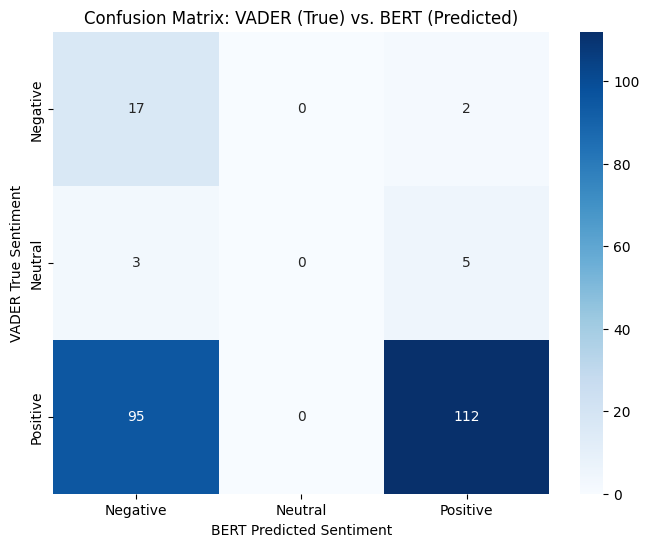

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Accuracy Score: {accuracy:.4f}")
print(f"F1-Score (Macro): {f1:.4f}")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('BERT Predicted Sentiment')
plt.ylabel('VADER True Sentiment')
plt.title('Confusion Matrix: VADER (True) vs. BERT (Predicted)')
plt.show()

## Summary:

- The accuracy score comparing VADER and BERT sentiments is 0.5513.
- The F1-score (macro average) is 0.3136.
- The confusion matrix is provided below, where rows represent VADER's labels (Negative, Neutral, Positive) and columns represent BERT's predictions (Negative, Neutral, Positive):

    ```
    [[ 17   0   2]
    [  3   0   5]
    [ 95   0 112]]
    ```

### Key Findings
- The accuracy score between VADER (true labels) and BERT (predicted labels) is approximately 0.5513, indicating that BERT's sentiment predictions aligned with VADER's for about 55.13% of the reviews.

- The macro-averaged F1-score comparing the two models is 0.3136, suggesting a significant disagreement in how well the models classify different sentiment categories.

- The confusion matrix reveals a notable pattern where BERT rarely predicted the 'Neutral' sentiment, with all zero entries in the 'Neutral' prediction column.

- A significant number of reviews labeled 'Positive' by VADER (95 instances) were predicted as 'Negative' by BERT, indicating a major area of discrepancy.

### Insights or Next Steps
*   Investigate why BERT almost never predicts 'Neutral' sentiment in comparison to VADER. This could involve examining the distribution of 'Neutral' labels in the VADER output, BERT's training data, or the specific text characteristics of 'Neutral' reviews.
*   Further analyze the 95 instances where VADER identified 'Positive' sentiment but BERT predicted 'Negative' to understand the underlying textual features that lead to such divergent classifications between the two models.


# Task -3: Investigation steps towards Insights/findings

## VADER's Neutral Sentiment Distribution

Let's understand the distribution of 'Neutral' sentiment as identified by VADER. This will give us context on how often VADER labels reviews as neutral.


In [32]:
neutral_vader_count = car_reviews_df['sentiment_vdr'].value_counts().get('Neutral', 0)
print(f"Number of 'Neutral' sentiment labels identified by VADER: {neutral_vader_count}")

Number of 'Neutral' sentiment labels identified by VADER: 8


Now that we have the count of VADER's neutral sentiment, the next step is to examine BERT's predictions for those specific reviews.

In [33]:
print("BERT's predictions for reviews VADER labeled as 'Neutral':")
neutral_vader_reviews = car_reviews_df[car_reviews_df['sentiment_vdr'] == 'Neutral']
print(neutral_vader_reviews[['sentiment_hft', 'confidence_hft']])

BERT's predictions for reviews VADER labeled as 'Neutral':
    sentiment_hft  confidence_hft
19       NEGATIVE        0.998343
34       POSITIVE        0.915457
42       POSITIVE        0.982082
50       NEGATIVE        0.998869
51       NEGATIVE        0.998869
54       POSITIVE        0.969418
108      POSITIVE        0.994699
224      POSITIVE        0.979430


In [35]:
print("Cleaned review text for VADER's 'Neutral' reviews:")
neutral_vader_reviews['cleaned_review_text']

Cleaned review text for VADER's 'Neutral' reviews:


,cleaned_review_text
19,hondas engineer go work upgrade suspension ste...
34,competent 2015 sonata 24 isnt dynamically clas...
42,gmc yukon 2 big technology big suv may enough
50,gmc 12 ton 60 cant repair motor never suppose ...
51,gmc 12 ton 60 cant repair motor never suppose ...
54,2015 gmc yukon yukon xl refine economical ever...
108,2011 buick regal offer midsize sedan buyer spo...
224,2016 bmw 3 series muscular engine nimble handl...


## Findings on BERT's Neutral Prediction

**Observations:**

1.  **VADER's Neutral Count**: VADER identified only 8 reviews as 'Neutral' out of 234 total reviews, which is a very small proportion of the dataset.
2.  **BERT's Predictions for VADER's Neutrals**: For these 8 reviews that VADER considered 'Neutral', BERT did not predict 'Neutral' for any of them. Instead, BERT classified them as either 'POSITIVE' (6 reviews) or 'NEGATIVE' (2 reviews) with high confidence scores.
    *   Example BERT predictions for VADER's 'Neutral' reviews:
        *   "hondas engineer go work upgrade suspension ste..." (VADER: Neutral) -> BERT: NEGATIVE (0.998343 confidence)
        *   "competent 2015 sonata 24 isnt dynamically clas..." (VADER: Neutral) -> BERT: POSITIVE (0.915457 confidence)
        *   "gmc yukon 2 big technology big suv may enough" (VADER: Neutral) -> BERT: POSITIVE (0.982082 confidence)
        *   "gmc 12 ton 60 cant repair motor never suppose ..." (VADER: Neutral) -> BERT: NEGATIVE (0.998869 confidence)

**Conclusion:**

BERT demonstrates a strong bias towards classifying reviews as either 'POSITIVE' or 'NEGATIVE', even for texts that VADER identifies as 'Neutral'. The confusion matrix previously showed zero predictions for the 'Neutral' class by BERT, and this detailed analysis confirms that BERT consistently avoids assigning a 'Neutral' label. This suggests that BERT's sentiment model (distilbert-base-uncased-finetuned-sst-2-english), being fine-tuned on SST-2 which is a binary classification dataset (positive/negative), struggles to accurately capture or even acknowledge nuanced, non-polar sentiment. It forces texts into either a positive or negative category, even when the content might genuinely be ambiguous or balanced, as interpreted by VADER.